# Importing libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import sleep
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import sys 

In [ ]:
# reading the bottle dataset
path = 'D:/bottle.csv'
data = pd.read_csv(path, na_values=['na', '--'])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

# Filter Salnty variable of the CalCOFI dataset

In [4]:
main_data = data['Salnty']
main_data.head()

0    33.440
1    33.440
2    33.437
3    33.420
4    33.421
Name: Salnty, dtype: float64

In [5]:
# check missing values in the Salnty column
null_df = main_data.isnull()
display(null_df.head())

0    False
1    False
2    False
3    False
4    False
Name: Salnty, dtype: bool

In [6]:
# To identify the total missing values 
main_data.isnull().sum()

47354

In [7]:
# There are lots of missing values, so we can fill with mean and then compare to the original data
# fill null data with .mean()
fillna_mean = main_data.fillna(main_data.mean())
fillna_mean

0         33.4400
1         33.4400
2         33.4370
3         33.4200
4         33.4210
           ...   
864858    33.4083
864859    33.4083
864860    33.4150
864861    33.4062
864862    33.3880
Name: Salnty, Length: 864863, dtype: float64

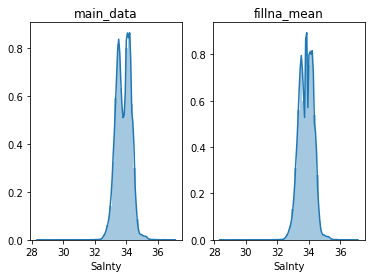

In [8]:
# Compare original data and missing values' data filled with mean()
fig, ax = plt.subplots(1,2)
sns.distplot(main_data, ax=ax[0])
ax[0].set_title('main_data')
sns.distplot(fillna_mean, ax=ax[1])
ax[1].set_title('fillna_mean')
plt.show()

# Data Standardization 

In [9]:
# scale the data
scaled_data = preprocessing.scale(main_data)

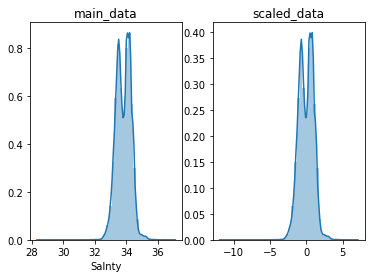

In [11]:
fig, ax = plt.subplots(1,2)
sns.distplot(main_data, ax=ax[0])
ax[0].set_title('main_data')
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title('scaled_data')
plt.show()

# Data Normalization 

In [ ]:
# normalize the data (index 0 is for positive)
normalized_data = stats.boxcox(main_data)[0]

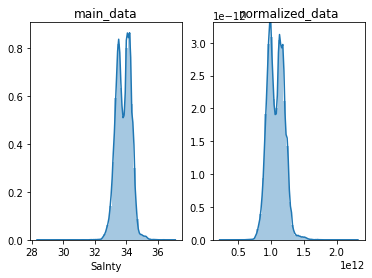

In [14]:
fig, ax = plt.subplots(1,2)
sns.distplot(main_data, ax=ax[0])
ax[0].set_title('main_data')
sns.distplot(normalized_data, ax=ax[1])
ax[1].set_title('normalized_data')
plt.show()

# Relationship between Salinity and Water temperature (Salnty and T_degC)

In [15]:
path = 'D:/bottle.csv'
data = pd.read_csv(path)
display(data.head())
display(data.info())

C:\Users\VHD\anaconda3\envs\gis_env\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

None

In [16]:
# picking up Salnty and T_degC from dataset
df = data[['Salnty','T_degC']]
df = df[:500]
display(df)

,Salnty,T_degC
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45
...,...,...
495,34.269,4.90
496,34.310,4.50
497,34.311,4.48
498,34.319,4.21


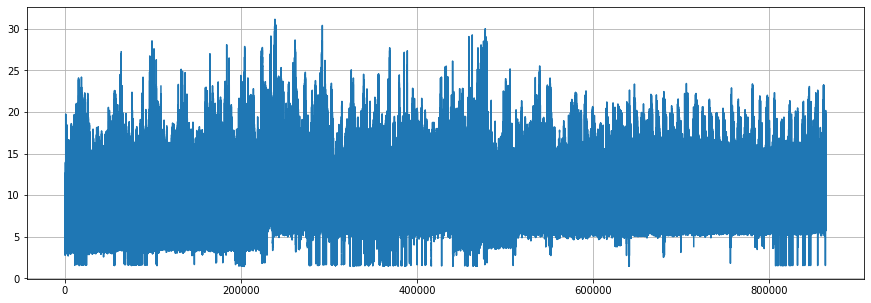

In [24]:
# Plotting temperature variable
plt.figure(figsize=(15,5))
plt.plot(data.index, data['T_degC'])
plt.grid()
plt.show()

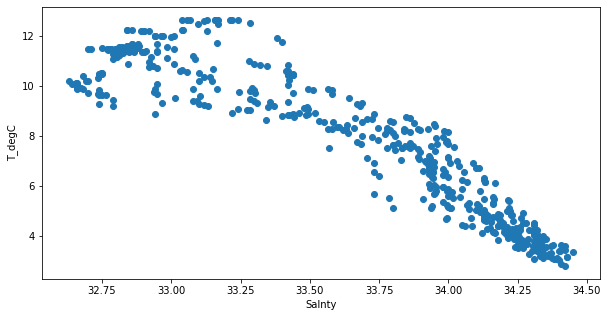

In [22]:
# Show فwo variables relative to each other
plt.figure(figsize=(10,5))
plt.scatter(df['Salnty'], df['T_degC'])
plt.xlabel('Salnty')
plt.ylabel('T_degC')
plt.show()

In [25]:
# Check missing values of two variables
df.isnull().sum()

Salnty    6
T_degC    1
dtype: int64

In [26]:
# Replacing missing values with mean of data
m = df['T_degC'].mean()
n = df['Salnty'].mean()
values = {'Salnty': n, 'T_degC': m}
df.fillna(value=values, inplace=True)

In [28]:
# setting up x and y for regression

x = np.array(df['T_degC'])
y = np.array(df['Salnty'])

display(x.shape)
display(y.shape)

(500,)

(500,)

In [29]:
# To convert 1D to 2D

x = x.reshape(-1,1)
y = y.reshape(-1,1)

display(x.shape)
display(y.shape)

(500, 1)

(500, 1)

In [31]:
# Separate train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# 1- Simple resgression

In [32]:
# Set up the model
model = LinearRegression()
model.fit(x_train, y_train)
print(sys.getsizeof(model))
r_sq = model.score(x_test, y_test)

56


In [33]:
# Checking the result of the model: R2, intercept, and coeficient
display(r_sq)
display(model.intercept_)
display(model.coef_)

0.8327804689996717

array([35.00800237])

array([[-0.17657854]])

In [ ]:
# To pridict the model
y_pred = model.predict(x_test)
display(y_pred)

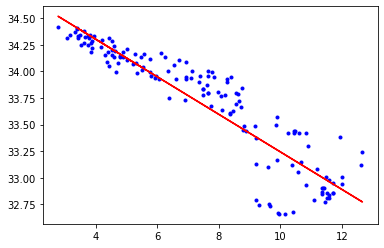

In [35]:
# Visualizing the predicted model 
plt.plot(x_test,y_test,'.b')
plt.plot(x_test,y_pred,'-r')
plt.show()

# 2- Polynomial

In [ ]:
# Check the model with degree 3 
t = PolynomialFeatures(degree=3, include_bias=False).fit(x_train)
X_train = t.transform(x_train)
display(X_train)

In [74]:
# Set up the model
model2 = LinearRegression().fit(X_train, y_train)
r_sq = model2.score(t.transform(x_test), y_test)

In [75]:
# Checking the results
display(r_sq)
display(model2.intercept_)
display(model2.coef_)

0.8493369926510127

array([33.04359697])

array([[ 0.71291999, -0.12034157,  0.00501601]])

In [76]:
X_test = t.transform(x_test)
y_pred2 = model2.predict(X_test)

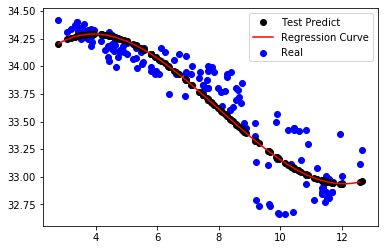

In [77]:
# Plotting the result of the polynomial model
plt.scatter(x_test, y_test, color='b')
plt.plot(x_test, y_pred2, 'ko' )
curve_x = np.arange(np.min(x_test), np.max(x_test),.1)
curve_y = model2.predict(t.fit_transform(curve_x.reshape(-1,1)))
plt.plot(curve_x, curve_y, 'r' )
plt.legend(['Test Predict', 'Regression Curve','Real'])
plt.show()